![example](images/director_shot.jpeg)

# What Makes a Movie Successful? An  Investigation into Characteristics of High-Grossing Films

**Author:** Sam Oliver
***

## Overview

The goal of this project is to analyze which qualities of films make them successful. The data used in this project comes from the Box Office Mojo and IMDB, and this analysis combines data from these sources. This analysis compares characteristics such as genre, runtime, and production studio with the total gross to render trends between these characteristics and the financial success of the film. The key findings of this report include the following: films that fit under action and adventure gross well, successful films tend to run between 75-170 minutes, and Pixar/Dreamworks tends to create very successful films on average. 

## Business Problem

To reiterate, the main goal is to define which characteristics found in films tend to create successful films. In this analysis, success is measured in light of the total amount the film has grossed. It should be noted that total gross refers to the combined value of both the domestic and foreign gross of the film. This metric is not necessarily the necessary, objective measure of success. For instance, the metric of success could be changed to how well the film is rated. 

This analysis  will import datasets found on Box Office Mojo and IMDB, and then select which categories are the most likely to determine the success of a film. This analysis will then offer visualizations for an understanding of how these categories affect success.

## Data Understanding

Box Office Mojo and IMDB have publicly-available datasets about films. This analysis consolidates these datasets into one.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data

# get preview list of the files
import glob, os
fpath = 'zippedData/'
os.listdir(fpath)

['bom.movie_gross.csv.gz',
 'imdb.name.basics.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.basics.csv.gz',
 'imdb.title.crew.csv.gz',
 'imdb.title.principals.csv.gz',
 'imdb.title.ratings.csv.gz',
 'rt.movie_info.tsv.gz',
 'rt.reviews.tsv.gz',
 'tmdb.movies.csv.gz',
 'tn.movie_budgets.csv.gz']

In [3]:
# search string 
query = fpath+"*.gz"

file_list = glob.glob(query)
file_list

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\rt.movie_info.tsv.gz',
 'zippedData\\rt.reviews.tsv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

In [4]:
tables = {}

# loop through file lsit and get a preview of the files - notice the tsv files
for file in file_list:
    print('---'*20)
    file_name = file.replace('zippedData\\','').replace('.', '_')
    print(file_name)
    
    if '.tsv.gz' in file:
        tmp_df = pd.read_csv(file, sep="\t",encoding="latin-1")
    else:
        tmp_df = pd.read_csv(file)
    display(tmp_df.head(),tmp_df.tail())
    tables[file_name] = tmp_df

------------------------------------------------------------
bom_movie_gross_csv_gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


------------------------------------------------------------
imdb_name_basics_csv_gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


------------------------------------------------------------
imdb_title_akas_csv_gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,title_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0


------------------------------------------------------------
imdb_title_basics_csv_gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


------------------------------------------------------------
imdb_title_crew_csv_gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


------------------------------------------------------------
imdb_title_principals_csv_gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,ordering,nconst,category,job,characters
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
1028185,tt9692684,5,nm10441595,producer,producer,NaN


------------------------------------------------------------
imdb_title_ratings_csv_gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


------------------------------------------------------------
rt_movie_info_tsv_gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


------------------------------------------------------------
rt_reviews_tsv_gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


------------------------------------------------------------
tmdb_movies_csv_gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


------------------------------------------------------------
tn_movie_budgets_csv_gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [5]:
# creating copies of the tables I will use
bom_movie_gross = tables['bom_movie_gross_csv_gz'].copy()
imdb_title_ratings = tables['imdb_title_ratings_csv_gz'].copy()
imdb_title_basics = tables['imdb_title_basics_csv_gz'].copy()

### Merging the tables

In [6]:
# Where can I join these tables? What is tconst on the IMDB tables?
# tconst is a unique identifier for a particular film, so I'm going
# to go ahead and merge the two imdb tables together
imdb_table = pd.merge(imdb_title_ratings, imdb_title_basics, on="tconst")
imdb_table

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [7]:
# now I want to merge imdb_table with bom on title. I will use original title
# for imdb and title for bom. I am not going to merge on primary title because
# there may be areas in which there are the same primary title and title but
# they may not refer to the same film. Original title is more likely to give
# more complete title information

# first I will change the original_title in imdb to title so that I can merge
imdb_table_tmp = imdb_table.rename(columns={"original_title": "title"})

# merge bom and imdb on title
imdb_bom_table = pd.merge(imdb_table_tmp, bom_movie_gross, on="title")
imdb_bom_table

,tconst,averagerating,numvotes,primary_title,title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000,2013
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000,2011
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000,2010
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Par.,209400000.0,485300000,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
2442,tt3142688,5.8,5841,Finding Fanny,Finding Fanny,2014,102.0,"Adventure,Comedy,Drama",FIP,616000.0,7100000,2014
2443,tt3399916,6.3,4185,The Dead Lands,The Dead Lands,2014,107.0,"Action,Adventure",Magn.,5200.0,NaN,2015
2444,tt3748512,7.4,4977,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,Cohen,260000.0,NaN,2015
2445,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",Focus,6800000.0,5000000,2018


## Data Preparation

### Cleaning the data

In [8]:
# I will remove tconst. tconst is not necessary anymore because it
# was only useful for joining the imdb tables. I can also drop primary title 
# because it is redundant to have both title columns... I am also going to 
# drop start year to remove redundancies with year

table1 = imdb_bom_table.drop(['primary_title', 'tconst', 'start_year'], axis=1)
table1

,averagerating,numvotes,title,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,4.2,50352,The Legend of Hercules,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000,2014
1,5.1,8296,Baggage Claim,96.0,Comedy,FoxS,21600000.0,887000,2013
2,7.6,326657,Moneyball,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000,2011
3,6.5,87288,Hereafter,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000,2010
4,7.4,428142,Mission: Impossible - Ghost Protocol,132.0,"Action,Adventure,Thriller",Par.,209400000.0,485300000,2011
...,...,...,...,...,...,...,...,...,...
2442,5.8,5841,Finding Fanny,102.0,"Adventure,Comedy,Drama",FIP,616000.0,7100000,2014
2443,6.3,4185,The Dead Lands,107.0,"Action,Adventure",Magn.,5200.0,NaN,2015
2444,7.4,4977,Hitchcock/Truffaut,79.0,Documentary,Cohen,260000.0,NaN,2015
2445,7.0,18768,Boy Erased,115.0,"Biography,Drama",Focus,6800000.0,5000000,2018


In [9]:
# I am now going to combine domestic and foreign gross to get total gross
# convert foreign gross to float type
table1["foreign_gross"] = table1["foreign_gross"].str.replace(",",
                                                              "").astype(float)
table1['domestic_gross'] = table1['domestic_gross'].astype(float)

#I will onvert NaN values from both domestic and foreign gross to 0
table1['domestic_gross'] = table1['domestic_gross'].fillna(0)
table1['foreign_gross'] = table1['foreign_gross'].fillna(0)

# time to add them together
total_gross = table1['domestic_gross'] + table1['foreign_gross']
table1['total_gross'] = total_gross
table1

,averagerating,numvotes,title,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year,total_gross
0,4.2,50352,The Legend of Hercules,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0,2014,61200000.0
1,5.1,8296,Baggage Claim,96.0,Comedy,FoxS,21600000.0,887000.0,2013,22487000.0
2,7.6,326657,Moneyball,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0,2011,110200000.0
3,6.5,87288,Hereafter,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0,2010,105200000.0
4,7.4,428142,Mission: Impossible - Ghost Protocol,132.0,"Action,Adventure,Thriller",Par.,209400000.0,485300000.0,2011,694700000.0
...,...,...,...,...,...,...,...,...,...,...
2442,5.8,5841,Finding Fanny,102.0,"Adventure,Comedy,Drama",FIP,616000.0,7100000.0,2014,7716000.0
2443,6.3,4185,The Dead Lands,107.0,"Action,Adventure",Magn.,5200.0,0.0,2015,5200.0
2444,7.4,4977,Hitchcock/Truffaut,79.0,Documentary,Cohen,260000.0,0.0,2015,260000.0
2445,7.0,18768,Boy Erased,115.0,"Biography,Drama",Focus,6800000.0,5000000.0,2018,11800000.0


In [10]:
# now remove domestic and foreign gross columns
table1 = table1.drop(['domestic_gross', 'foreign_gross'], axis=1)
table1

,averagerating,numvotes,title,runtime_minutes,genres,studio,year,total_gross
0,4.2,50352,The Legend of Hercules,99.0,"Action,Adventure,Fantasy",LG/S,2014,61200000.0
1,5.1,8296,Baggage Claim,96.0,Comedy,FoxS,2013,22487000.0
2,7.6,326657,Moneyball,133.0,"Biography,Drama,Sport",Sony,2011,110200000.0
3,6.5,87288,Hereafter,129.0,"Drama,Fantasy,Romance",WB,2010,105200000.0
4,7.4,428142,Mission: Impossible - Ghost Protocol,132.0,"Action,Adventure,Thriller",Par.,2011,694700000.0
...,...,...,...,...,...,...,...,...
2442,5.8,5841,Finding Fanny,102.0,"Adventure,Comedy,Drama",FIP,2014,7716000.0
2443,6.3,4185,The Dead Lands,107.0,"Action,Adventure",Magn.,2015,5200.0
2444,7.4,4977,Hitchcock/Truffaut,79.0,Documentary,Cohen,2015,260000.0
2445,7.0,18768,Boy Erased,115.0,"Biography,Drama",Focus,2018,11800000.0


In [11]:
# check for duplicates
table1.duplicated().sum()

0

In [12]:
# There aren't any duplicates, so that's great!
# Let's get more info - I'm skeptical about how useful year and studio will be
# but I think they should be kept for now...
table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2446
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    2447 non-null   float64
 1   numvotes         2447 non-null   int64  
 2   title            2447 non-null   object 
 3   runtime_minutes  2402 non-null   float64
 4   genres           2443 non-null   object 
 5   studio           2444 non-null   object 
 6   year             2447 non-null   int64  
 7   total_gross      2447 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 172.1+ KB


In [13]:
# so there are some places where there are null objects... Let's deal with 
# those! I first want to drop the places where genres are null
table1 = table1.dropna(axis=0, subset=['genres'])
table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 0 to 2446
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    2443 non-null   float64
 1   numvotes         2443 non-null   int64  
 2   title            2443 non-null   object 
 3   runtime_minutes  2400 non-null   float64
 4   genres           2443 non-null   object 
 5   studio           2440 non-null   object 
 6   year             2443 non-null   int64  
 7   total_gross      2443 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 171.8+ KB


In [14]:
# I do think it is important to understand how runtime affects likeability and
# success of a particular film. There are only 43 missing, so let's just drop
# those to maintain consistent accuracy.
table1 = table1.dropna(axis=0, subset=['runtime_minutes'])

# let's also chekc to see if there are still null elements in the studio col.
table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 2446
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    2400 non-null   float64
 1   numvotes         2400 non-null   int64  
 2   title            2400 non-null   object 
 3   runtime_minutes  2400 non-null   float64
 4   genres           2400 non-null   object 
 5   studio           2397 non-null   object 
 6   year             2400 non-null   int64  
 7   total_gross      2400 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 168.8+ KB


In [15]:
# There are only 3 more rows that contain NaN values, but because these are
# studio values, I actually would like to change these null values to simply
# say 'unknown'
table1 = table1.fillna('Unknown')

# sanity check - make sure it worked
table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 2446
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    2400 non-null   float64
 1   numvotes         2400 non-null   int64  
 2   title            2400 non-null   object 
 3   runtime_minutes  2400 non-null   float64
 4   genres           2400 non-null   object 
 5   studio           2400 non-null   object 
 6   year             2400 non-null   int64  
 7   total_gross      2400 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 168.8+ KB


In [16]:
# Year seems to be ONLY useful insofar as it affects total_gross
# so we might need to look out for the effects observed during the pandemic
# and we also should control for inflation - if possible.
# First, we need some information about the year column - let's get min & max
print(table1['year'].max())
print(table1['year'].min())

2018
2010


In [17]:
# so the min year value is 2010 and the max value is 2018. Therefore, the 
# pandemic is not a concern for this data. 
# After doing some research into inflation, it does not seem necessary to 
# adjust for it considering the roughly flat inflation rates between 2010-2018
# Thus, I will just drop the year column.
table1 = table1.drop(['year'], axis=1)
table1

,averagerating,numvotes,title,runtime_minutes,genres,studio,total_gross
0,4.2,50352,The Legend of Hercules,99.0,"Action,Adventure,Fantasy",LG/S,61200000.0
1,5.1,8296,Baggage Claim,96.0,Comedy,FoxS,22487000.0
2,7.6,326657,Moneyball,133.0,"Biography,Drama,Sport",Sony,110200000.0
3,6.5,87288,Hereafter,129.0,"Drama,Fantasy,Romance",WB,105200000.0
4,7.4,428142,Mission: Impossible - Ghost Protocol,132.0,"Action,Adventure,Thriller",Par.,694700000.0
...,...,...,...,...,...,...,...
2442,5.8,5841,Finding Fanny,102.0,"Adventure,Comedy,Drama",FIP,7716000.0
2443,6.3,4185,The Dead Lands,107.0,"Action,Adventure",Magn.,5200.0
2444,7.4,4977,Hitchcock/Truffaut,79.0,Documentary,Cohen,260000.0
2445,7.0,18768,Boy Erased,115.0,"Biography,Drama",Focus,11800000.0


## Data Analysis
The categories that I will use to compare with total gross will be runtime, genre, and studio. These categories will be used to act as indicators for how they affect the total gross of the film. 

The first category to consider is genre. The dataset will be sorted by total gross and grouped by genre. It will also remove genres that have very few representations within the dataset. The goal of this project is to find trends that are particularly telling for a film's success, and it is not helpful to use genres that only appear in the dataset once or a few times. Thus, this analysis includes the top 50 appearing genres, and all of these genres have appeared more than 10 times in the data. In this part of the analysis, the median total gross is chosen to compare with genre because there are multiple films that fall under each observed genre in this particular subset. The median renders an approach to observe a metric of centrality for these films, which will be particular useful in light of the goal of this project. The analysis for studio and total gross also follows this same subset process carried out in the genre analysis. The last category analyzed is runtime. Runtime is used to answer the question of what the length of successful films typically is.

In [18]:
# Here you run your code to model the data
# There are a couple primary ways in which I would like to analyze this data:
# total gross amount and ratings. These are the primary ways in which we can
# see which films are doing well. First, I want to analyze genres and gross

# Visualize total gross and genre - I will use a boxplot to show the median &
# quartiles to get a rough understanding of how well movies do in accordance
# to the genre they fall under

# There are a lot of different genres, so I am going to make a copy of the df
# and plot the top 10 genres in terms of median total gross

# first I will want to group the data set by genre and median gross
df1 = table1.copy()
df1 = df1.drop(["averagerating", "numvotes", "title", "runtime_minutes",
                "studio"], axis=1)
df1 = df1.groupby("genres").median()
df1 = df1.sort_values(by=["total_gross"], ascending=False)

#keep the first 10 genres
df1 = df1.head(10)
pd.options.display.float_format = '{:,.1f}'.format

df1

,total_gross
genres,
"Adventure,Drama,Sport","1,276,400,000.0"
"Adventure,Fantasy","956,000,000.0"
Family,"857,600,000.0"
Sci-Fi,"821,900,000.0"
"Adventure,Drama,Sci-Fi","653,750,000.0"
"Action,Adventure,Sci-Fi","563,400,000.0"
"Biography,Drama,Musical","435,000,000.0"
"Animation,Comedy,Family","416,600,000.0"
"Documentary,Drama,Sport","411,375,000.0"


<ipython-input-19-b375c45a46de>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  genre_gross_plot.set_xticklabels(['Adventure,Drama,Sport', "Adventure,Family",
<ipython-input-19-b375c45a46de>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  genre_gross_plot.set_xticklabels(genre_gross_plot.get_xticklabels(),


Text(0, 0.5, 'Median Total Gross in Millions')

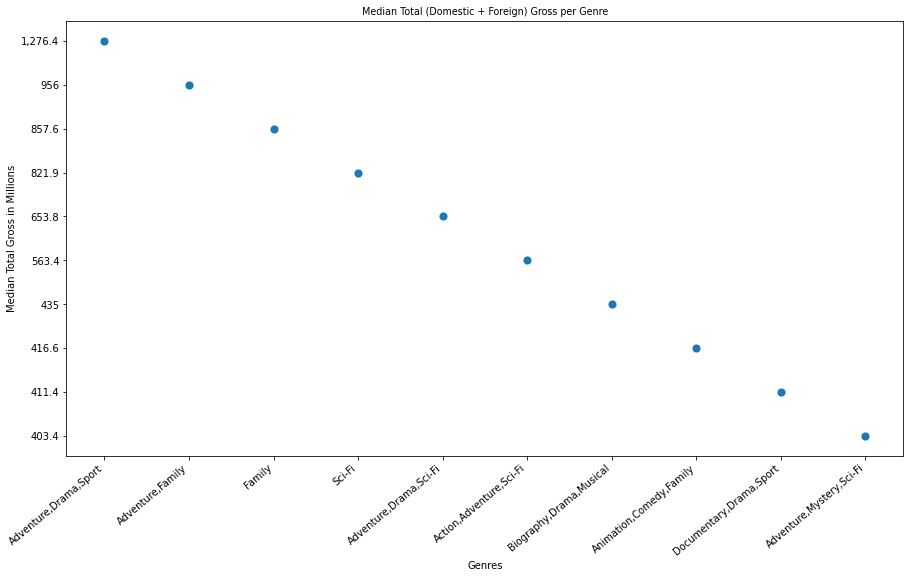

In [19]:
# plot the scatter plot for df1
median_gross = ['1,276.4', '956', '857.6', '821.9', '653.8', '563.4',
               '435','416.6','411.4','403.4']

genre_gross_plot = sns.scatterplot(data=df1, x='genres', y=median_gross, s=80)
# sns.set(rc={'figure.figsize':(7,7)})
genre_gross_plot.set_xticklabels(['Adventure,Drama,Sport', "Adventure,Family",
                                  "Family", "Sci-Fi",
                                  "Adventure,Drama,Sci-Fi",
                                 "Action,Adventure,Sci-Fi",
                                 "Biography,Drama,Musical",
                                 "Animation,Comedy,Family",
                                 "Documentary,Drama,Sport",
                                 "Adventure,Mystery,Sci-Fi"])

genre_gross_plot.set_xticklabels(genre_gross_plot.get_xticklabels(), 
                                 rotation = 40, 
                                 ha="right")
sns.set_context("paper")

# plt.tight_layout()
plt.gcf().set_size_inches(15, 8)

# set titles
genre_gross_plot.set_title('Median Total (Domestic + Foreign) Gross per Genre')
genre_gross_plot.set_xlabel('Genres')
genre_gross_plot.set_ylabel('Median Total Gross in Millions')

In [20]:
# I realized that some of these genres are only represented a few times, so it
# is a good idea to analyze this trend again but now leave the top 50 genres
# by count.

# repeating code from the table used to generate the previous process:
# first I will want to group the data set by genre count and leave the top 50
df2 = table1.copy()
df2 = df2.drop(["averagerating", "numvotes", "title", "runtime_minutes",
                "studio"], axis=1)

df2 = df2.groupby("genres").count()

df2 = df2.sort_values(by=["total_gross"], ascending=False)

# rename total gross
df2 = df2.rename(columns={"total_gross": "Count"})

#keep the first 25 genres
df2 = df2

pd.options.display.float_format = '{:,.1f}'.format

df2

,Count
genres,
Drama,192
"Comedy,Drama,Romance",121
Documentary,97
"Comedy,Drama",95
Comedy,74
...,...
"Comedy,Crime,Mystery",1
"Action,Crime,Horror",1
"Action,Comedy,War",1


In [21]:
# I am going to create another df with median gross to then merge with the
# count df

#copied, this time I will take the whole df, not just the first 10
df3 = table1.copy()
df3 = df3.drop(["averagerating", "numvotes", "title", "runtime_minutes",
                "studio"], axis=1)
df3 = df3.groupby("genres").median()
df3 = df3.sort_values(by=["total_gross"], ascending=False)

# rename total gross
df3 = df3.rename(columns={"total_gross": "median_total_gross"})

#keep the first 25 genres
pd.options.display.float_format = '{:,.1f}'.format

df3

,median_total_gross
genres,
"Adventure,Drama,Sport","1,276,400,000.0"
"Adventure,Fantasy","956,000,000.0"
Family,"857,600,000.0"
Sci-Fi,"821,900,000.0"
"Adventure,Drama,Sci-Fi","653,750,000.0"
...,...
"Documentary,History,News","13,200.0"
"Documentary,History,Thriller","7,100.0"
Animation,"4,400.0"


In [22]:
# now merge on genres...
df4 = df2.merge(df3, on="genres")

# I am going to keep the top 50 - this gives us film counts all over 10, and
# then I will sort the df by median_total_gross
df4 = df4.head(50)

df4 = df4.sort_values(by=["median_total_gross"], ascending=False)

# Now I just want to keep the top 10 of these
df4 = df4.head(10)

df4

,Count,median_total_gross
genres,,
"Action,Adventure,Sci-Fi",44,"563,400,000.0"
"Action,Adventure,Animation",17,"374,000,000.0"
"Action,Adventure,Fantasy",29,"334,900,000.0"
"Adventure,Animation,Comedy",69,"296,100,000.0"
"Action,Adventure,Thriller",17,"278,300,000.0"
"Action,Adventure,Comedy",25,"245,700,000.0"
"Adventure,Comedy,Family",11,"150,200,000.0"
"Action,Adventure,Drama",30,"113,850,000.0"
"Drama,Horror,Mystery",15,"79,400,000.0"


<ipython-input-23-15dcf1d272cd>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g_m_plot.set_xticklabels(['Action,Adventure,Sci-Fi',
<ipython-input-23-15dcf1d272cd>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  g_m_plot.set_yticklabels(['0', '100', '200', '300', '400', '500'])
<ipython-input-23-15dcf1d272cd>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  g_m_plot.set_xticklabels(g_m_plot.get_xticklabels(),


Text(0, 0.5, 'Median Total Gross in Millions')

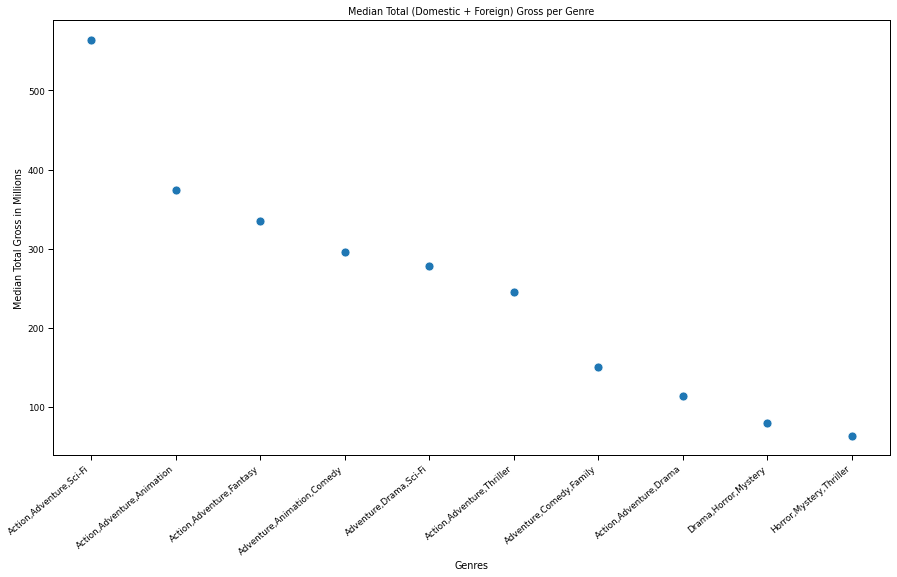

In [23]:
# Ok, now that we have a more representative set, we can get a better idea of
# the trend between median total gross and genres by eliminating films that
# are more of a "one-off" kind of success

# now to visualize this df...
g_m_plot = sns.scatterplot(data=df4, x='genres', y='median_total_gross',
                                   s=80)
plt.ticklabel_format(style='plain', axis='y')

# set x and y ticks
g_m_plot.set_xticklabels(['Action,Adventure,Sci-Fi',
                                  "Action,Adventure,Animation",
                                  "Action,Adventure,Fantasy",
                                  "Adventure,Animation,Comedy",
                                  "Adventure,Drama,Sci-Fi",
                                 "Action,Adventure,Thriller",
                                 "Adventure,Comedy,Family",
                                 "Action,Adventure,Drama",
                                 "Drama,Horror,Mystery",
                                 "Horror,Mystery,Thriller"])

g_m_plot.set_yticklabels(['0', '100', '200', '300', '400', '500'])


g_m_plot.set_xticklabels(g_m_plot.get_xticklabels(), 
                                 rotation = 40, 
                                 ha="right")

sns.set_context("paper")
plt.gcf().set_size_inches(15, 8)


# set titles
g_m_plot.set_title('Median Total (Domestic + Foreign) Gross per Genre')
g_m_plot.set_xlabel('Genres')
g_m_plot.set_ylabel('Median Total Gross in Millions')


Text(0, 0.5, 'Median Total Gross in Billions')

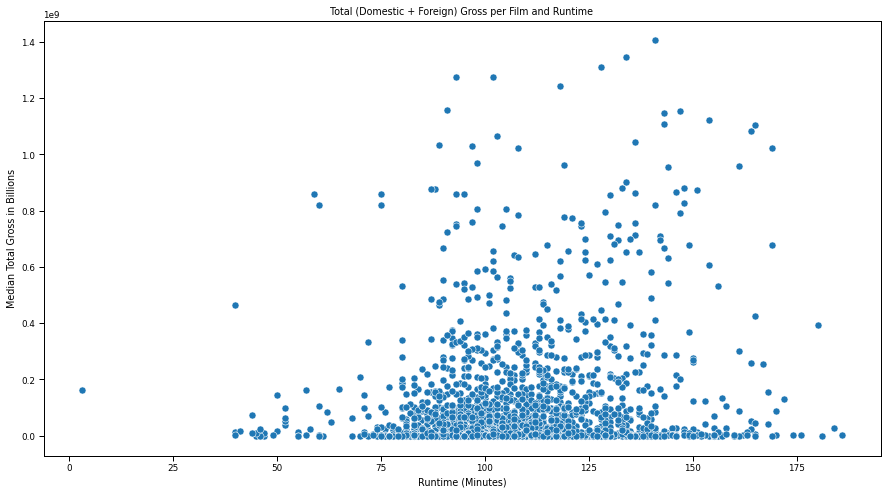

In [29]:
# now I am going to evaluate total gross with runtime and see if there is any
# particular trend
time_gross = table1.copy()
time_gross = time_gross.drop(["averagerating", "numvotes", "title", "genres",
                "studio"], axis=1)

t_g_plot = sns.scatterplot(data=time_gross, x='runtime_minutes', 
                           y='total_gross', s=50)

plt.gcf().set_size_inches(15, 8)

# set titles
t_g_plot.set_title('Total (Domestic + Foreign) Gross per Film and Runtime')
t_g_plot.set_xlabel('Runtime (Minutes)')
t_g_plot.set_ylabel('Median Total Gross in Billions')

In [25]:
# There's does not seem to be much of a trend here... but the lower half
# of the graph looks somewhat normally distributed. The most successful films
# (grossing over $800M are typically between roughly 80-160 minutes. 

# Now I am going to group by studios and see which studios typically produce 
# films with the highest total gross.
studio_df = table1.copy()
studio_df = studio_df.drop(["averagerating", "numvotes", "title",
                            "runtime_minutes", "genres"], axis=1)
studio_df = studio_df.groupby("studio").median()
studio_df = studio_df.sort_values(by=["total_gross"], ascending=False)

# rename total gross
studio_df = studio_df.rename(columns={"total_gross": "median_total_gross"})

pd.options.display.float_format = '{:,.1f}'.format

studio_df

,median_total_gross
studio,
P/DW,"524,950,000.0"
BV,"260,500,000.0"
GrtIndia,"254,200,000.0"
Fox,"152,300,000.0"
Sony,"147,500,000.0"
...,...
VE,"6,050.0"
Distrib.,"5,600.0"
TAFC,"4,600.0"


In [26]:
# I am also going to merge this dataset with one with the counts and sort by
# count so that I can eliminate movie studios that have very few films in the
# dataset. This will allow for a more complete analysis.

studio_tmp_df = table1.copy()
studio_tmp_df = studio_tmp_df.drop(["averagerating", "numvotes", "title",
                            "runtime_minutes", "genres"], axis=1)
studio_tmp_df = studio_tmp_df.groupby("studio").count()
studio_tmp_df = studio_tmp_df.sort_values(by=["total_gross"], ascending=False)

# rename total gross
studio_tmp_df = studio_tmp_df.rename(columns={"total_gross": "count"})

pd.options.display.float_format = '{:,.1f}'.format

studio_tmp_df

,count
studio,
Uni.,148
Fox,133
WB,117
IFC,116
LGF,89
...,...
CF&SR,1
Lorb.,1
Linn,1


In [27]:
# now merge on genres...
studio_median_total_gross_df = studio_tmp_df.merge(studio_df, on="studio")

# I am going to keep the top 50 - this gives us film counts all over 10, and
# then I will sort the df by median_total_gross
studio_median_total_gross_df = studio_median_total_gross_df.head(50)

studio_median_total_gross_df = studio_median_total_gross_df.sort_values(
    by=["median_total_gross"], ascending=False)

# Now I just want to keep the top 5 of these
studio_median_total_gross_df = studio_median_total_gross_df.head(5)

studio_median_total_gross_df

,count,median_total_gross
studio,,
P/DW,10,"524,950,000.0"
BV,89,"260,500,000.0"
Fox,133,"152,300,000.0"
Sony,81,"147,500,000.0"
WB (NL),46,"145,450,000.0"


Text(0.5, 0, 'Median Total Gross in Hundreds of Millions')

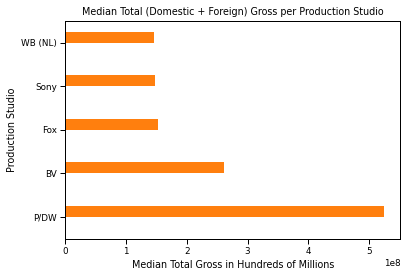

In [28]:
# plot bar chart also import figure to change size
plot = studio_median_total_gross_df.plot.barh(legend=False)

# set titles
plot.set_title('Median Total (Domestic + Foreign) Gross per Production Studio')
plot.set_ylabel('Production Studio')
plot.set_xlabel('Median Total Gross in Hundreds of Millions')

## Evaluation
There are three points to evaluate in consideration of which characteristics of films in the datasets typically correlate with high grossing films: genre, runtime, and studio. 

* Genres that includes action and adventure seem to do well in comparison to other films. Of the top ten genre categories, in terms of median total gross, five included both these genres, and adventure is included in the top eight of these ten.

* The analysis of runtime shows that films that have a high median total gross (over about five-hundred million dollars) almost always have a runtime between about 75 and 170 minutes. This range is wide, but it is still useful for predicting the success of a film.

* In the analysis of studio and median total gross, Pixar/Dreamworks studio was shown to have the highest gross, by far with a median gross of over five-hundred million dollars per film. It should be noted that there are only ten films in the utilized data subset that were categorized under this studio. It should also be noted that Buena Vista, the second highest grossing studio is no longer an active studio.

## Conclusions
It is highly recommended that films produced by this studio fall under the category of adventure or action and adventure. It is also highly recommended that films have runtime between 75 and 170 minutes. It may also be useful to contract with some of the higher-grossing studios or do further analysis on how these studios operate to then emulate their practices. 

This analysis should not be used as the end-all case for how to proceed with the production of films. This analysis is limited in so far as there may be other (better) indicators for successful movies. For example, a particular actor or director may be a better predictor for film success than the categories analyzed in this project.